<a href="https://colab.research.google.com/github/mfvalle/AlgorithmsUN2024I/blob/main/Lab6/BubbleSortOptDistributionWithoutRepGroupN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
from itertools import permutations
import numpy as np
import time

def bubble_sort_optimized(arr):
    comparisons = 0
    swaps = 0
    passes = 0

    n = len(arr)
    for i in range(n - 1):
        swapped = False
        for j in range(0, n - i - 1):
            comparisons += 1
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swaps += 1
                swapped = True
        passes += 1
        if not swapped:
            break

    return comparisons, swaps, passes

def generate_permutations(n):
    elements = list(range(1, n + 1))
    return list(permutations(elements))

def plot_time_histogram(n):
    perms = generate_permutations(n)
    time_list = []

    for perm in perms:
        start_time = time.time()
        bubble_sort_optimized(list(perm))
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_list.append(elapsed_time)

    time_list_str = [f"{t:.1e}" for t in time_list]
    unique_times, frequencies = np.unique(time_list_str, return_counts=True)

    plt.figure(figsize=(10, 6))
    plt.bar(unique_times, frequencies, color='orange', edgecolor='black')
    plt.title('Distribution of Time')
    plt.xlabel('Time (e-06 seconds)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_bubble_sort_data(n):
    perms = generate_permutations(n)
    num_permutations = len(perms)

    comparisons_list = []
    swaps_list = []
    steps_list = []
    passes_list = []

    for perm in perms:
        comparisons, swaps, passes = bubble_sort_optimized(list(perm))
        comparisons_list.append(comparisons)
        swaps_list.append(swaps)
        steps_list.append(comparisons + swaps)
        passes_list.append(passes)

    b = np.array(range(min(comparisons_list)-1, max(comparisons_list)+2)) + 0.5
    plt.hist(comparisons_list, bins=b, color="red")
    plt.title("Bubble Sort Comparisons")
    plt.xlabel("Comparisons")
    plt.ylabel("Frequency")
    plt.show()

    b = np.array(range(min(steps_list)-1, max(steps_list)+2)) + 0.5
    plt.hist(steps_list, bins=b, color="green")
    plt.title("Bubble Sort Steps")
    plt.xlabel("Steps")
    plt.ylabel("Frequency")
    plt.show()

    b = np.array(range(min(passes_list)-1, max(passes_list)+2)) + 0.5
    plt.hist(passes_list, bins=b, color="brown")
    plt.title("Bubble Sort Passes")
    plt.xlabel("Passes")
    plt.ylabel("Frequency")
    plt.show()



n=3


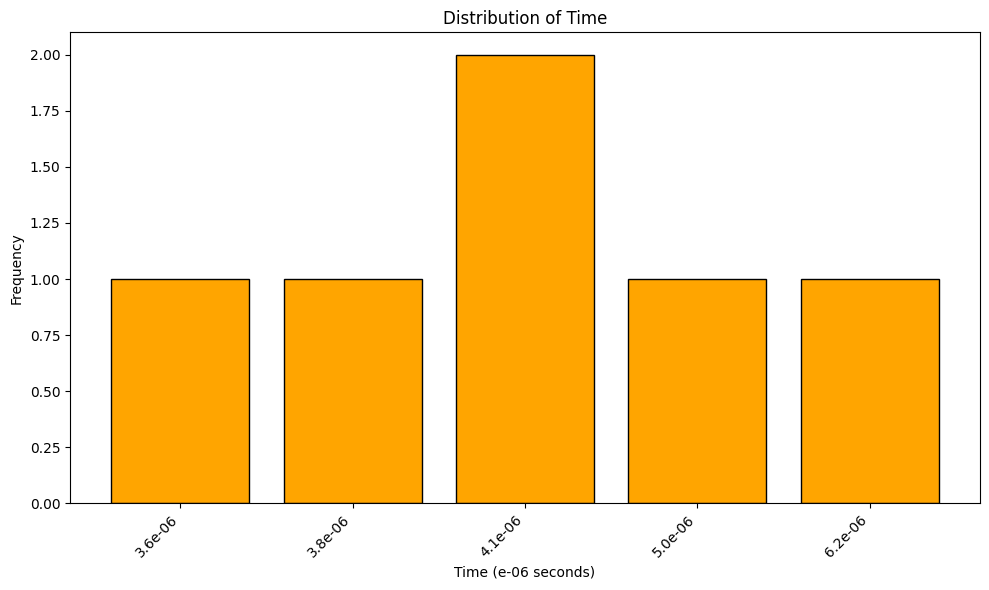

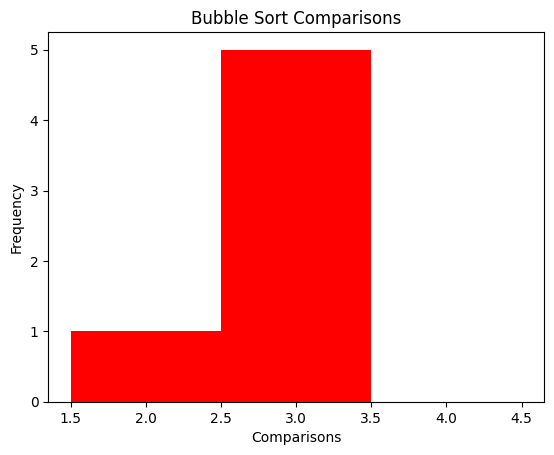

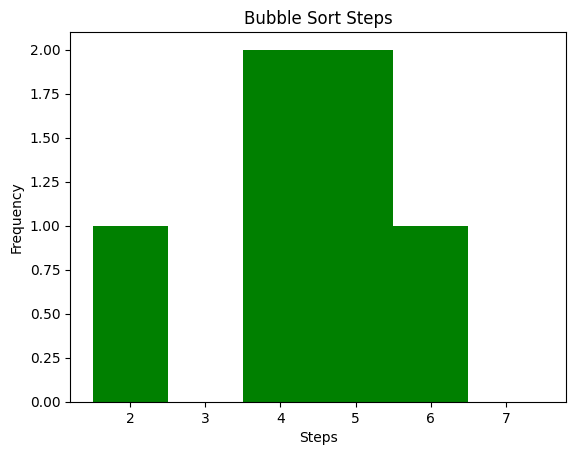

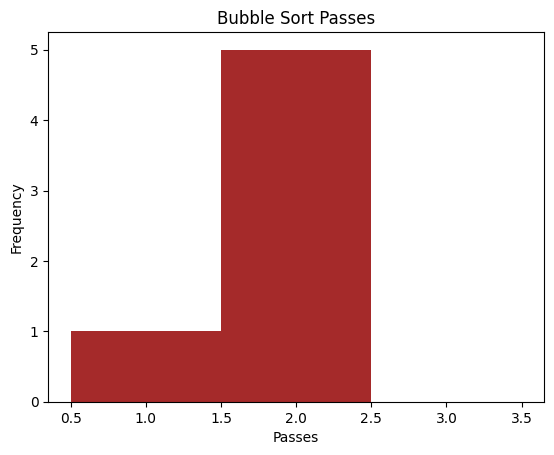

In [3]:
print("n=3")
plot_time_histogram(n)
plot_bubble_sort_data(n)